In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y = mnist["data"],mnist['target']
X.shape

(70000, 784)

In [3]:
type(X)

pandas.core.frame.DataFrame

In [4]:
y.shape

(70000,)

In [5]:
import numpy as np
y = y.astype(np.int8)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

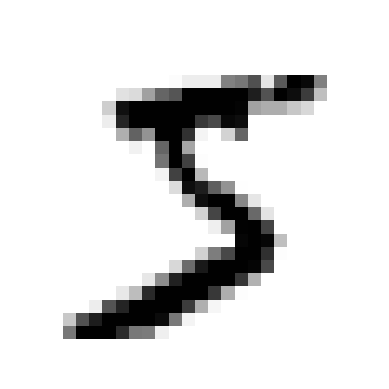

In [11]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
sgd_clf.predict([some_digit])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5,cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [17]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [22]:
threshold=0

In [23]:
y_some_digit_pred=(y_scores>threshold)

In [24]:
y_some_digit_pred

array([ True])

In [25]:
threshold=8000

In [26]:
y_some_digit_pred=(y_scores>threshold)

In [27]:
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [29]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [30]:
from sklearn.metrics import precision_recall_curve

In [31]:
precisions, recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

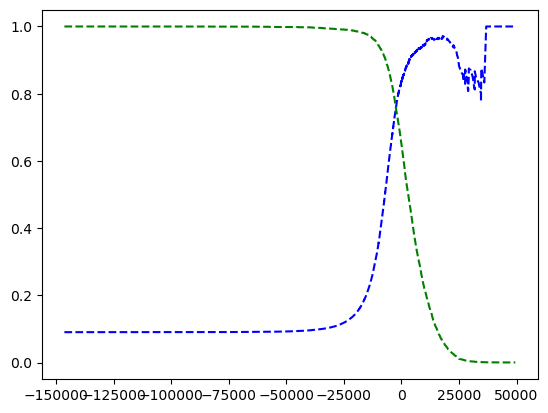

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall')

plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
plt.show()

In [33]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [34]:
y_train_pred_90=(y_scores>=threshold_90_precision)

In [36]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [37]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [35]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5, y_scores)

In [38]:
sgd_clf.fit (X_train,y_train)

SGDClassifier(random_state=42)

In [39]:
sgd_clf.predict ([some_digit])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int8)

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [41]:
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')